# **Doğrusal Olmayan Regresyon**

* [K-En Yakın Komşu(KNN)](#knn)
    * [Model](#knn_model)
    * [Tahmin](#knn_tahmin)
    * [Model Tuning](#knn_model_tuning)
* [Destek Vektör Regresyonu(SVR)](#svr)
    * [Model](#svr_model)
    * [Tahmin](#svr_tahmin)
    * [Model Tuning](#svr_model_tuning)
* [Doğrusal Olmayan SVR](#non_linear_svr)
    * [Model](#non_linear_svr_model)
    * [Tahmin](#non_linear_svr_tahmin)
    * [Model Tuning](#non_linear_svr_model_tuning)
* [Yapay Sinir Ağları(YSA)](#ysa)
    * [Model](#ysa_model)
    * [Tahmin](#ysa_tahmin)
    * [Model Tuning](#ysa_model_tuning)
* [Regresyon Ağaçları(CART)](#cart)
    * [Model](#cart_model)
    * [Tahmin](#cart_tahmin)
    * [Model Tuning](#cart_model_tuning)
* [Bagged Trees](#bag)
    * [Model](#bag_model)
    * [Tahmin](#bag_tahmin)
    * [Model Tuning](#bag_model_tuning)
* [Random Forests(RF)](#rf)
    * [Model](#rf_model)
    * [Tahmin](#rf_tahmin)
    * [Model Tuning](#rf_model_tuning)
* [Gradient Boosting Machines(GBM)](#gbm)
    * [Model](#gbm_model)
    * [Tahmin](#gbm_tahmin)
    * [Model Tuning](#gbm_model_tuning)
* [XGBoost](#xgb)
    * [Model](#xgb_model)
    * [Tahmin](#xgb_tahmin)
    * [Model Tuning](#xgb_model_tuning)
* [LightGBM](#lgbm)
    * [Model](#lgbm_model)
    * [Tahmin](#lgbm_tahmin)
    * [Model Tuning](lgbm_model_tuning)
* [CatBoost](#cb)
    * [Model](#cb_model)
    * [Tahmin](#cb_tahmin)
    * [Model Tuning](#cb_model_tuning)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# K-En yakın Komşu (KNN) <a id="knn"/>

Tahminler gözlem benzerliğine göre yapılır. (Bana arkadaşını söyle sana kim olduğunu söyleyeyim)

Parametrik olmayan bir öğrenme türüdür.

Büyük veri setlerinde performans açısından çok da iyi olduğu söylenemez ama sınıflandırma problemleri için ortaya çıkmış, daha sonra regresyon problemlerine uyarlanmıştır.

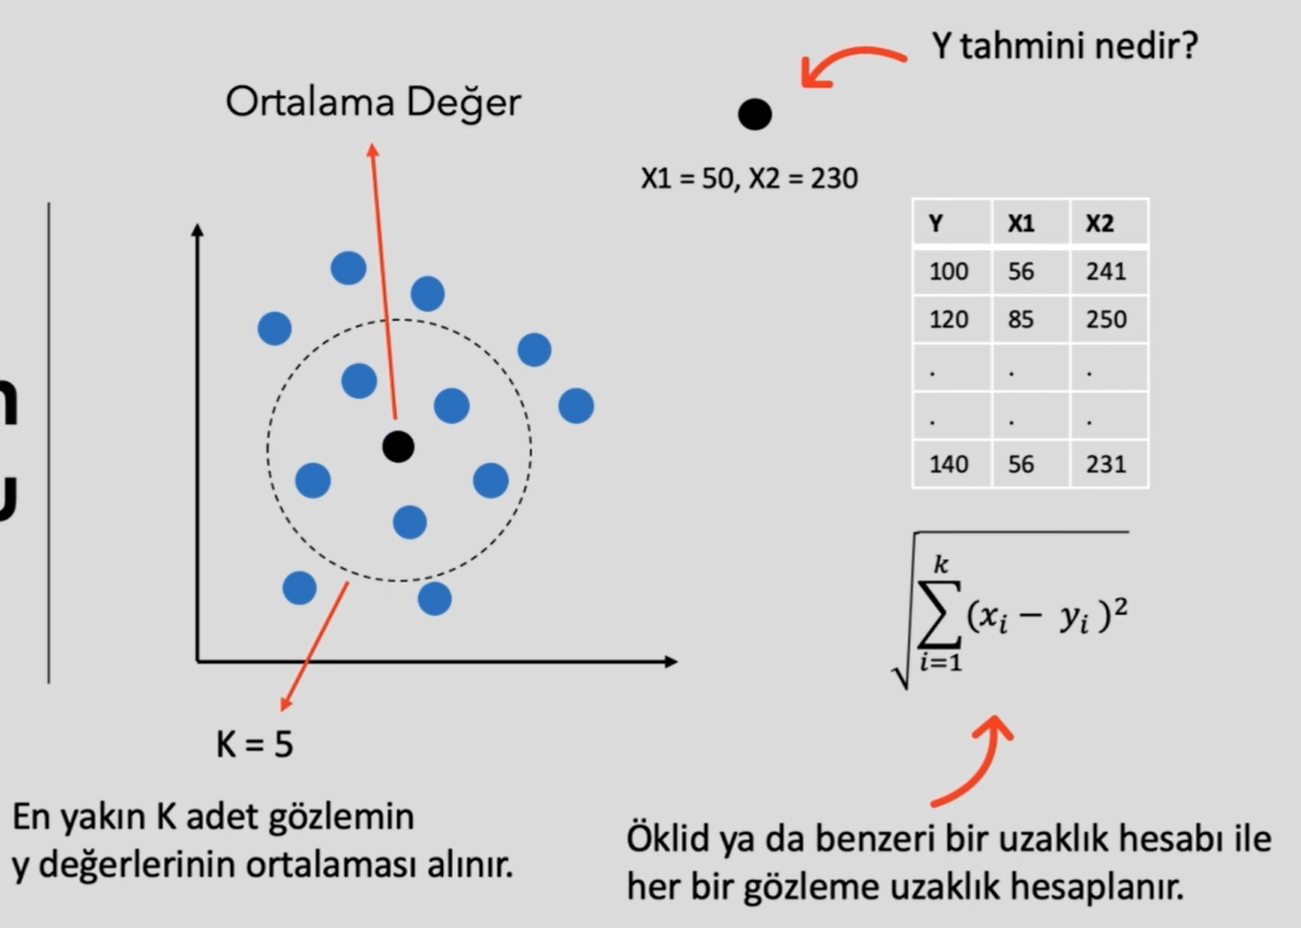


**KNN Basamakları**
* Komşu sayısını belirle(K)
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver. 

## Model <a id="knn_model"/>

In [2]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [5]:
knn_model.n_neighbors

5

## Tahmin <a id="knn_tahmin"/>

In [6]:
knn_model.predict(X_test)

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [9]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri:",rmse)

k = 1 için RMSE değeri: 0.0
k = 2 için RMSE değeri: 179.52761335480352
k = 3 için RMSE değeri: 205.20157172291863
k = 4 için RMSE değeri: 220.5139794876305
k = 5 için RMSE değeri: 239.64671325413764
k = 6 için RMSE değeri: 243.5904190007242
k = 7 için RMSE değeri: 258.1478781634636
k = 8 için RMSE değeri: 266.05374203349805
k = 9 için RMSE değeri: 269.73782093553376
k = 10 için RMSE değeri: 271.2798300436963


## Model Tuning <a id="knn_model_tuning" />

In [10]:
knn_params = {'n_neighbors': np.arange(1, 30, 1)}

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [13]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
# En iyi parametre
knn_cv_model.best_params_['n_neighbors']

8

In [15]:
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k =", k, "için RMSE değeri:",rmse, "RMSE_CV değeri:", rmse_cv)

k = 1 için RMSE değeri: 0.0 RMSE_CV değeri: 325.39475147063825
k = 2 için RMSE değeri: 179.52761335480352 RMSE_CV değeri: 293.24000183333817
k = 3 için RMSE değeri: 205.20157172291863 RMSE_CV değeri: 283.7486667487823
k = 4 için RMSE değeri: 220.5139794876305 RMSE_CV değeri: 286.3240222024089
k = 5 için RMSE değeri: 239.64671325413764 RMSE_CV değeri: 290.0705466132226
k = 6 için RMSE değeri: 243.5904190007242 RMSE_CV değeri: 298.1263115575851
k = 7 için RMSE değeri: 258.1478781634636 RMSE_CV değeri: 294.77070479194987
k = 8 için RMSE değeri: 266.05374203349805 RMSE_CV değeri: 291.98672028891235
k = 9 için RMSE değeri: 269.73782093553376 RMSE_CV değeri: 295.7162739573105
k = 10 için RMSE değeri: 271.2798300436963 RMSE_CV değeri: 301.31047022701154


In [16]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"])

In [17]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [18]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# Destek Vektör Regresyonu (SVR) <a id="svr"/>

Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alınabilecek şekilde doğru ya da eğriyi belirlemektir. 

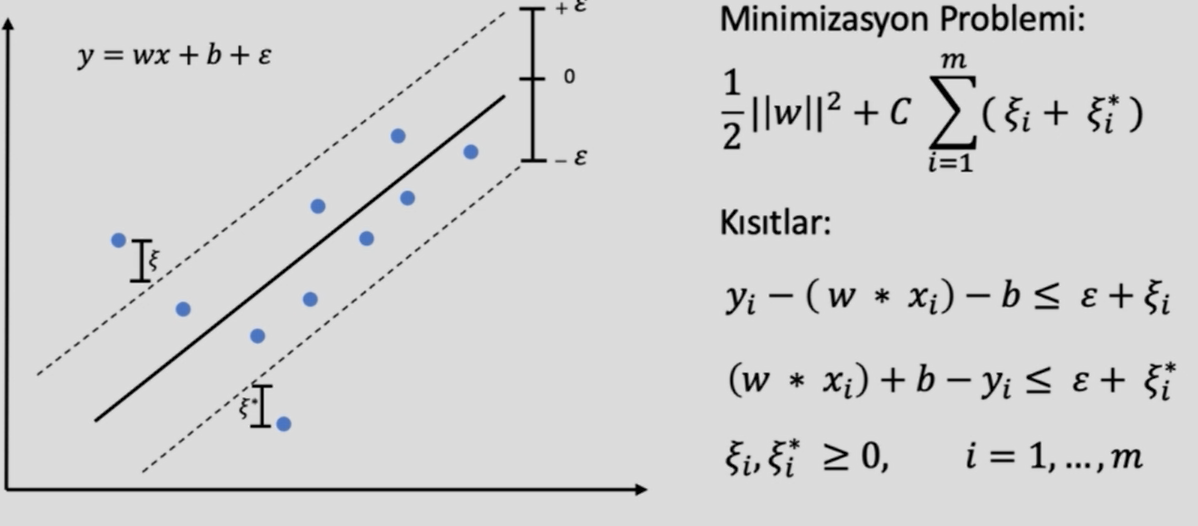

## MODEL <a id = "svr_model"/>

In [19]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [21]:
from sklearn.svm import SVR

In [22]:
svr_model = SVR("linear").fit(X_train, y_train)

In [23]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [24]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [25]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [26]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [27]:
y_pred = svr_model.predict(X_train)

**Eğer lineer model çizersek SVR'dan daha yüksek değer verdiğini görürüz(grafikte daha yukarıda bir line olacak)**

**Bunun sebebi aykırı gözlemlerin basit lineer modeli daha çok etkilemesidir.**


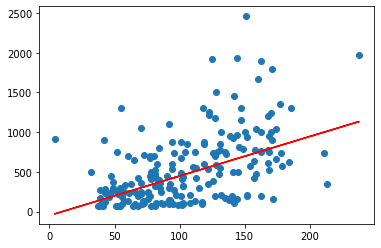

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red");

## TAHMİN <a id="svr_tahmin"/>

In [29]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [30]:
svr_model.predict([[91]])

array([403.52804878])

In [31]:
y_pred = svr_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

## Model Tuning <a id="svr_model_tuning">

In [33]:
svr_model #tune etmemiz gereken parametre c karmaşıklık parametresi

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
svr_params = {"C":np.arange(0.1, 2, 0.1)}

In [35]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10)

In [36]:
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
svr_cv_model.best_params_

{'C': 0.1}

In [38]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [39]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [40]:
y_pred = svr_tuned.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR <a id="non_linear_svr"/>

Buradaki aykırı gözlemler regresyon eğrilerimizi şu şekilde etkilemiş : 
* Ekk'yı aşağı dopru çekiştirmiş
* svr'yi daha az etkilemiş

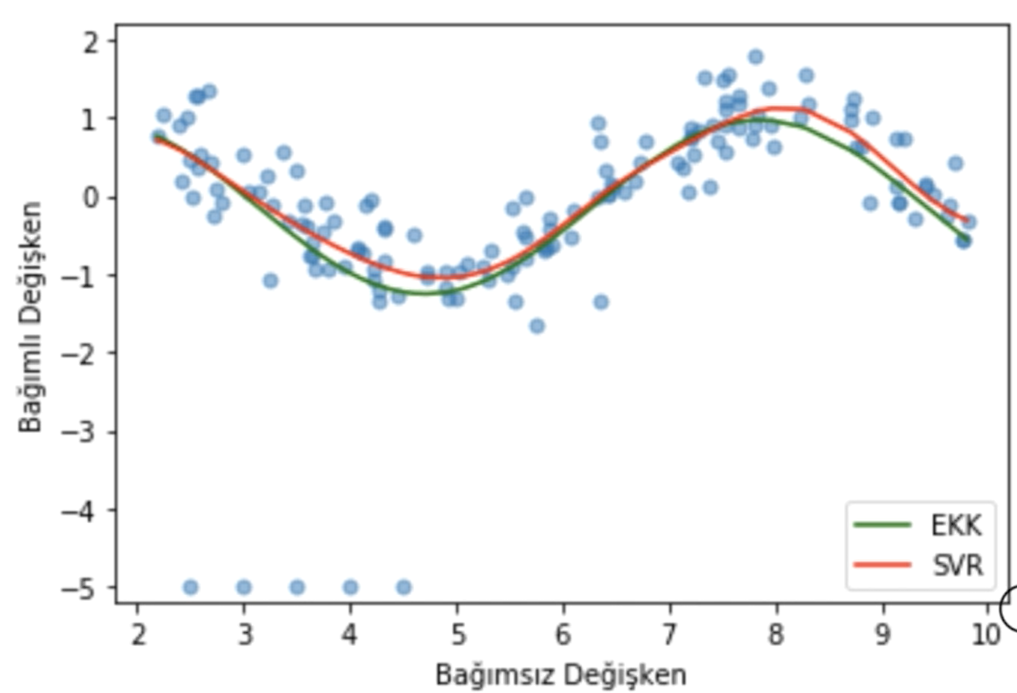


## Model <a id="non_linear_svr_model"/>

In [42]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin <a id="non_linear_svr_tahmin"/>

In [44]:
y_pred = svr_rbf.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

473.4445984431814

## Model Tuning <a id="non_linear_svr_model_tuning"/>

In [46]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
svr_params = {"C":[0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10).fit(X_train, y_train)


In [48]:
svr_cv_model

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
svr_cv_model.best_params_

{'C': 20}

In [50]:
svr_tuned = SVR(kernel='rbf', C=pd.Series(svr_cv_model.best_params_)[0])
svr_tuned.fit(X_train, y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = svr_tuned.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred)) # düşük olmalı

472.20974524750574

# YAPAY SİNİR AĞLARI (YSA) <a id="ysa"/>

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından biridir.

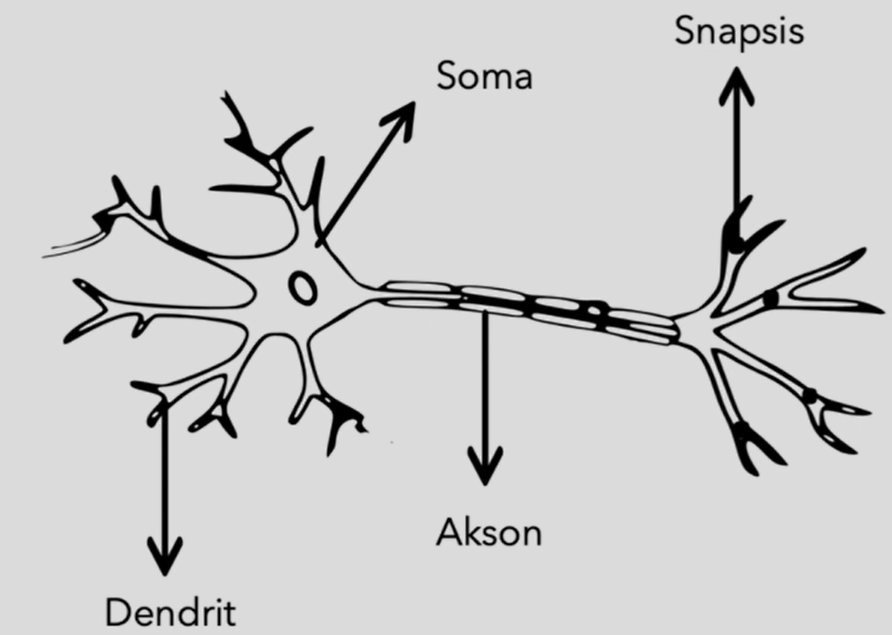

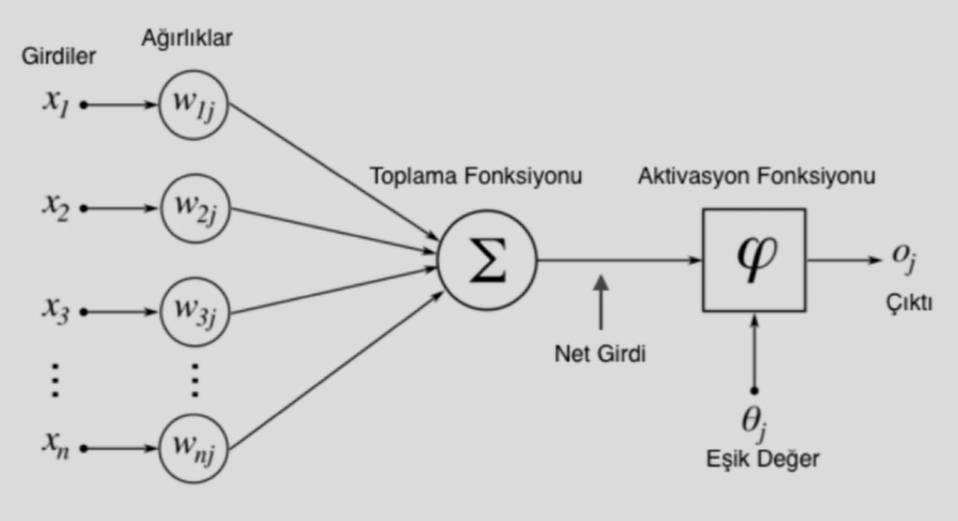

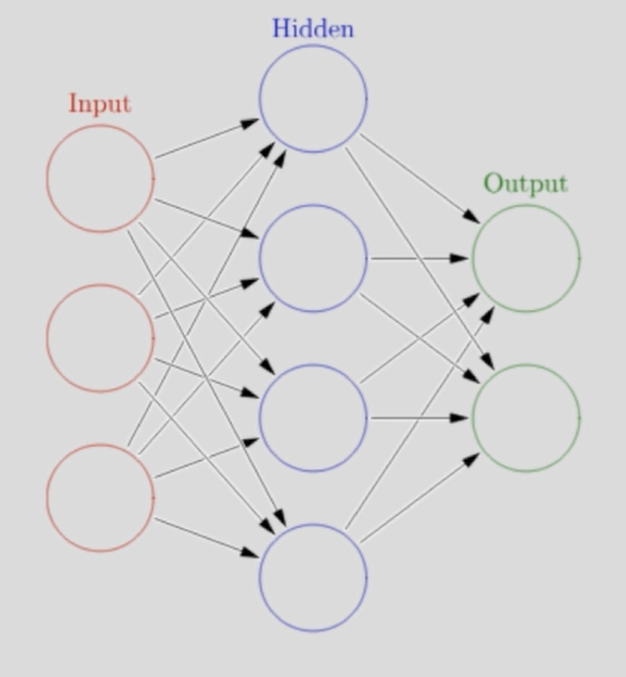

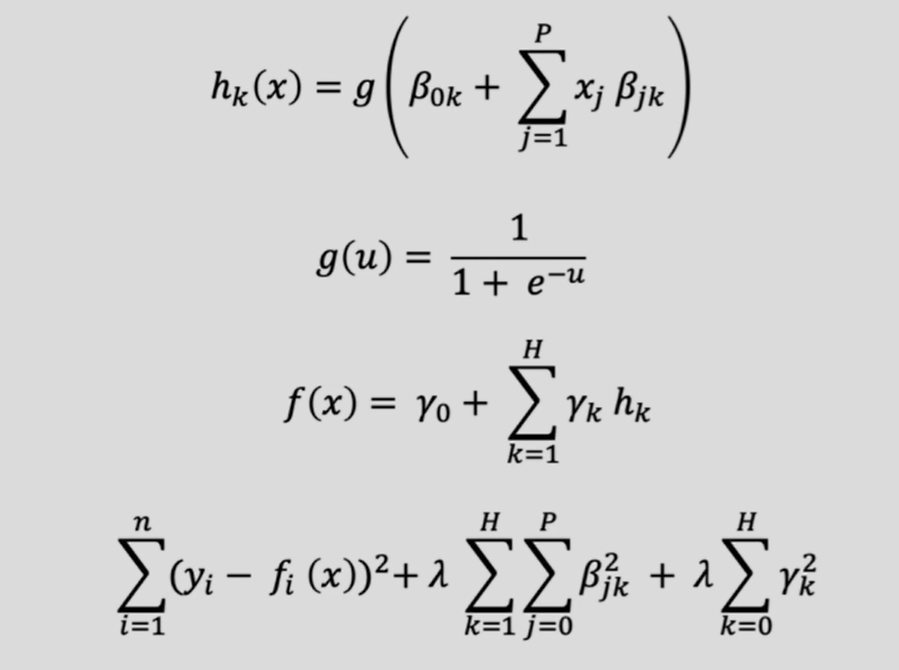

## Model <a id="ysa_model"/>

In [53]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train_scaled = scaler.transform(X_train)

In [57]:
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.neural_network import MLPRegressor

In [59]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 20)).fit(X_train_scaled, y_train)

In [60]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
mlp_model.n_layers_

4

In [62]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin <a id="ysa_tahmin"/>

In [63]:
mlp_model.predict(X_train_scaled)[:4]

array([ 43.859741  , 289.82539443, 225.20119391,  33.30049834])

In [64]:
y_pred = mlp_model.predict(X_test_scaled)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

498.6694544609706

## Model Tuning <a id="ysa_model_tuning"/>

In [66]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
mlp_params = {'alpha': [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes':[(20, 20), (100, 50, 150), (300, 200, 150)],
             'activation': ['relu', 'logistic', 'tanh']}

In [68]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10).fit(X_train_scaled, y_train)

In [69]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [70]:
mlp_tuned = MLPRegressor(alpha=0.01, activation='relu', hidden_layer_sizes=(100, 50, 150))

In [71]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.5112965130257

# Classidication and Regression Trees (CART) <a id="cart" />

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.

Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
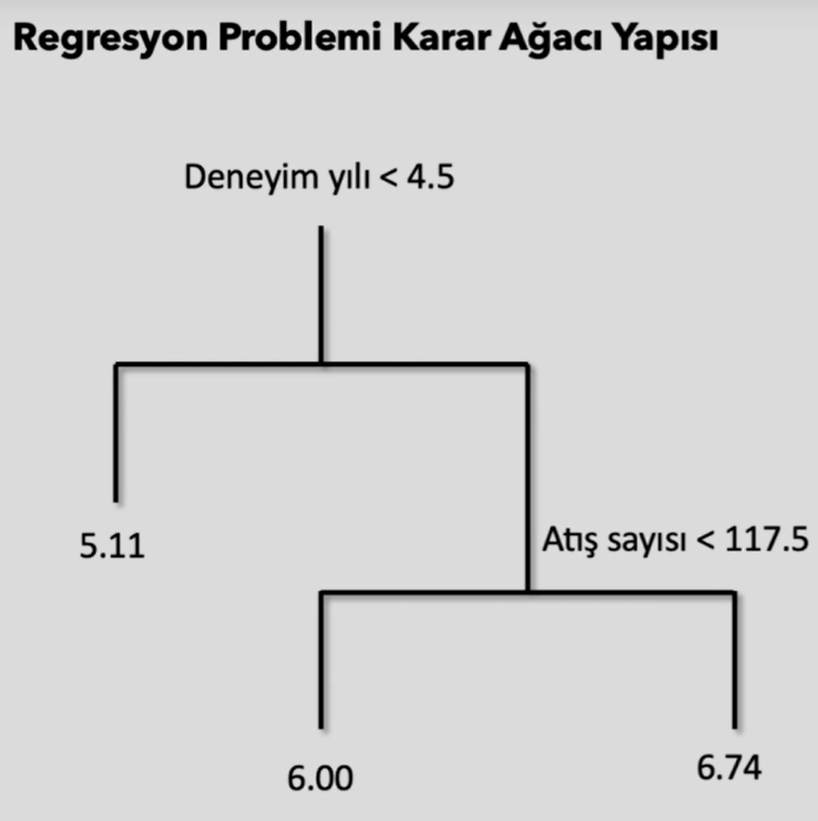 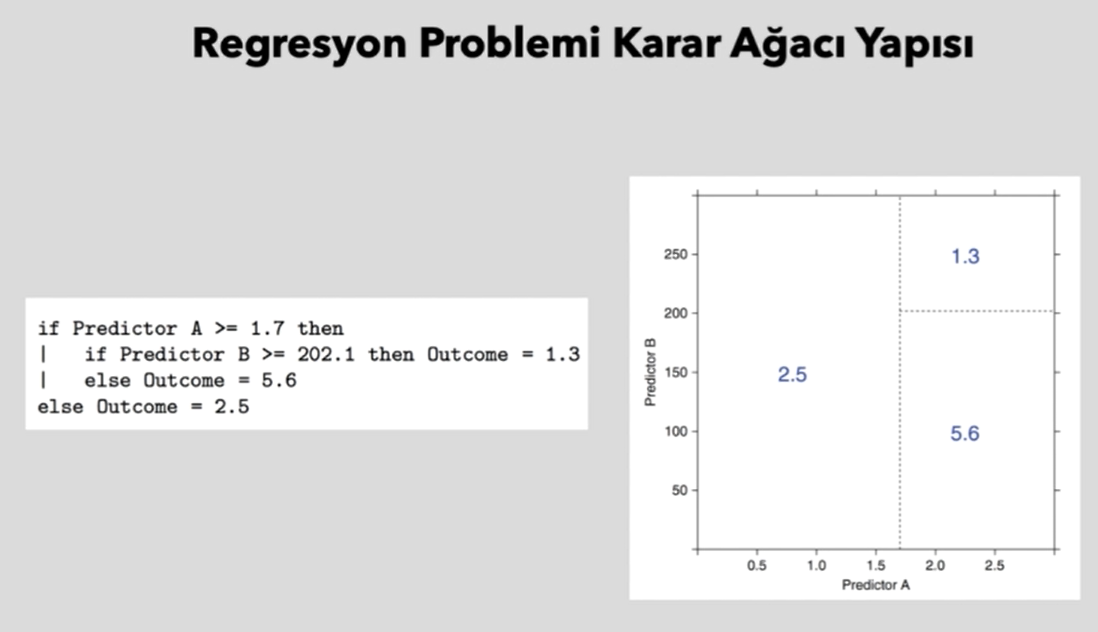

## MODEL <a id="cart_model"/>

In [74]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test['Hits'])

In [85]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [86]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [87]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

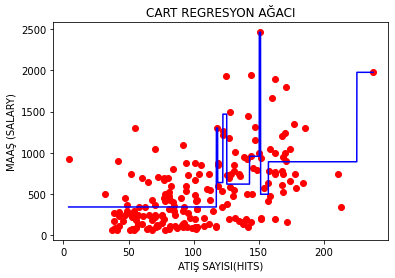

In [88]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, cart_model.predict(X_grid), color='blue')
plt.title('CART REGRESYON AĞACI')
plt.ylabel('MAAŞ (SALARY)')
plt.xlabel('ATIŞ SAYISI(HITS)');

#### KURAL SETİ 

In [89]:
#!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.5.5-cp37-none-any.whl size=57153 sha256=402dcdf549cf93e89ba59c37886b2b3f103ce65a4d4f74c77e420773b1a5f8fc
  Stored in directory: C:\Users\omerc\AppData\Local\pip\Cache\wheels\21\eb\99\6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler


In [90]:
from skompiler import skompile

In [91]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



## Tahmin <a id="cart_tahmin" />

In [93]:
x = [91]

In [94]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [97]:
cart_model.predict(X_test)[:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [98]:
cart_model.predict([[91]])

array([345.20115517])

In [99]:
y_pred = cart_model.predict(X_test)

In [100]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning <a id="cart_model_tuning" />

In [122]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test, y_pred))

450.20007561630223

In [125]:
cart_params = {"min_samples_split": range(2, 100),
         "max_leaf_nodes": range(2, 10)}

In [126]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [127]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [128]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [129]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76).fit(X_train, y_train)

In [130]:
cart_tuned

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=76, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [131]:
y_pred = cart_tuned.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

408.8749752940185

# Bagging <a id="bag" />

Temeli Bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır

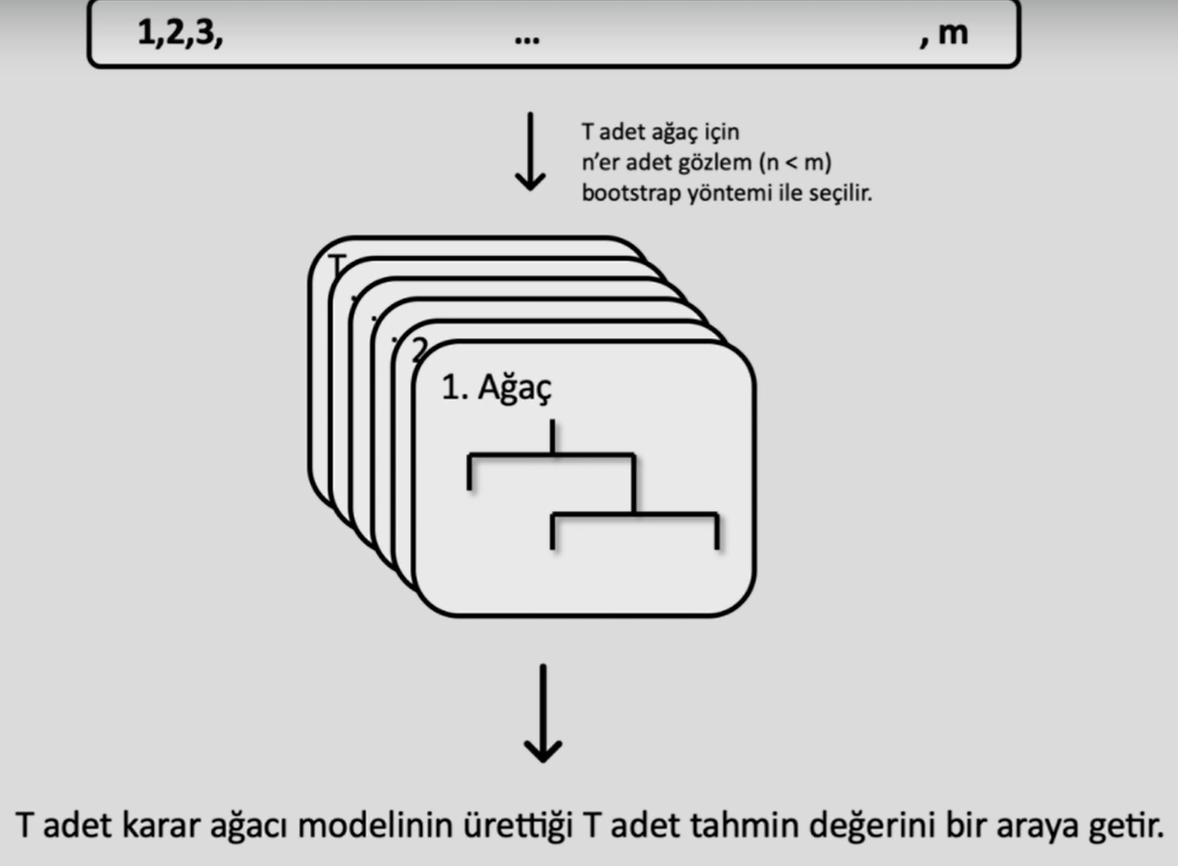

## Model <a id="bag_model" />

In [134]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [135]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [136]:
bag_model.n_estimators

10

In [138]:
bag_model.estimators_ # birbirinden farklı ağaçlar

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1628603065, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=2036219400, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_

In [139]:
bag_model.estimators_samples_

[array([166, 127, 121, 188, 192, 121,  58,  26,  53, 173, 195,  84, 157,
         25, 130, 102, 102, 157,  97, 179, 105, 134, 146, 188, 190, 117,
        106, 187, 172, 177, 189,  14,  91, 127,  79, 127,  34,  63,  66,
         17,  22, 169, 145, 158, 176, 148,  75, 140,  17, 149,  96,  77,
        125,  37, 127, 117, 181, 117, 143,  93,  69, 163,  67, 194, 145,
         32, 196, 103,  49, 177,  39, 120,  54, 102,  37, 182,  20,  81,
         16, 158, 183, 135,  94,  63, 196, 176, 179, 179, 166, 142, 167,
        122,   9,  59,  58,  67, 157,  70,  70,  29,  21, 176, 176, 178,
        119, 185,  34,  29,  98,  58,  55, 103,  73,  79, 118,  64,   9,
         16, 112,  90,  85, 130, 182, 196,  63, 144, 134,  15,   2, 180,
        191, 137,  57, 167, 140,  30, 143,  37, 113, 109,   3, 150, 129,
        108,  99, 140, 163, 169,  13, 140,  58, 139, 144, 172, 157,  28,
          1, 178,  65,  81, 139, 193,  86, 168, 135, 186, 160,  90,  14,
         13,  73, 132, 111, 121,  50, 115, 135,  60

In [140]:
# Her bir ağacın bağımsız değişkenleri
bag_model.estimators_features_

[array([10,  7, 13,  8, 14,  4, 11,  0,  3, 17,  3, 11,  4, 11, 18, 11, 14,
        12, 10]),
 array([ 7, 16,  9,  3, 17, 12, 10, 12,  5, 15, 11, 14,  5, 13, 17,  2, 18,
         8,  7]),
 array([ 0, 17,  7,  5, 14,  5,  3,  0, 14, 14, 16,  9,  7,  1, 18, 15,  7,
         3,  8]),
 array([18, 14,  3, 11,  6, 16, 18, 10,  9,  2,  1,  4,  4,  3, 12, 15,  8,
        11, 16]),
 array([ 7, 15,  4, 10, 17,  5,  0, 16,  1, 18, 15, 10, 10, 18,  9, 13,  5,
         3,  8]),
 array([ 2, 16,  1, 13,  0,  4,  4, 16, 13,  1,  7, 14, 14,  9,  0, 12, 11,
        16, 16]),
 array([14, 16, 10,  0,  3,  6,  0, 16,  7,  3,  2,  7,  2, 10,  0,  5, 16,
         5, 13]),
 array([16,  2, 15,  1,  7, 12,  6, 14,  8, 13, 10, 14,  2,  3,  3,  7, 15,
        11,  1]),
 array([18,  6,  2,  0,  7,  7, 12,  7,  1, 13,  1,  8, 13,  1, 10,  7, 10,
        13, 17]),
 array([ 5,  8, 11, 10, 16,  8, 17, 11, 13,  4, 10, 14,  2,  1, 12,  9,  4,
         7,  5])]

In [141]:
bag_model.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1628603065, splitter='best')

## Tahmin <a id="bag_tahmin" />

In [143]:
y_pred = bag_model.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))

374.62482986321436

In [146]:
# Birkaç ağaca sorma 
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [147]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

469.56103939522524

## Model Tuning <a id="bag_model_tuning"/>

In [149]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [150]:
bag_params = {"n_estimators": range(2, 20)}

In [151]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv=10)

In [152]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': range(2, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [153]:
bag_cv_model.best_params_

{'n_estimators': 12}

In [170]:
bag_tuned = BaggingRegressor(n_estimators=14, random_state=42)

In [171]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=14,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [172]:
y_pred = bag_tuned.predict(X_test)

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.89112389223493

# Random Forests <a id="rf" />

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır
* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile **değişkenler random subspace yöntemi ile seçilir**
* Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
* Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri, ağaçların performans değerlendirmesi ve değişken değişken öneminin belirlenmesi için kullanılır. 
* Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyonda p/3, sınıflamada karekök p)
* Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.



## Model <a id="rf_model"/>

In [174]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rf_model = RandomForestRegressor(random_state=42)

In [177]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## Tahmin <a id="rf_tahmin"/>

In [178]:
rf_model.predict(X_test)[:5]

array([ 782.2   , 1071.75  , 1619.    ,  147.4167,  671.    ])

In [179]:
y_pred = rf_model.predict(X_test)

In [180]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.04044281427

## Model Tuning <a id="rf_model_tuning"/>

In [182]:
rf_params = {'max_depth' : list(range(1,10)),
            'max_features': [3, 5, 10, 15],
            'n_estimators': [200, 500, 1000, 2000]}

In [183]:
rf_model = RandomForestRegressor(random_state=42)

n_jobs argumanını -1 yaptığımızda burada aranacak parametre sayısı çok olduğundan dolayı işlemcinin tam performans kullanılmasını sağlar

In [185]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs = -1).fit(X_train, y_train)

In [186]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [187]:
rf_tuned = RandomForestRegressor(max_features=3, max_depth=8, n_estimators=200)

In [188]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [189]:
y_pred = rf_tuned.predict(X_test)

In [190]:
np.sqrt(mean_squared_error(y_test, y_pred))

339.2648757875496

#### Değişlenlerin bağımlı değişkenlere etkilerine göre sıralaması

In [191]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index = X_train.columns## Model Tuning <a id="xgb_model_tuning"/>)

Text(0.5, 0, 'Değişkenlerin Önem Düzeyleri')

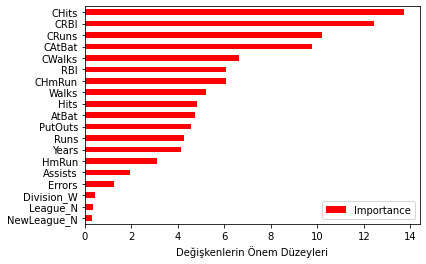

In [192]:
Importance.sort_values(by="Importance", axis=0,ascending=True).plot(kind="barh", color="r")

plt.xlabel("Değişkenlerin Önem Düzeyleri")

# Gradient Boosting Machines (GBM) <a id="gbm"/>

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

Artıkların üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. 

**Boosting:** Zayıf öğrencileri bir araya getirip güçlü bir öğrenci ortaya çıkartmak fikrine dayanır.

**Adaptive Boosting(AdaBoost):** Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır.

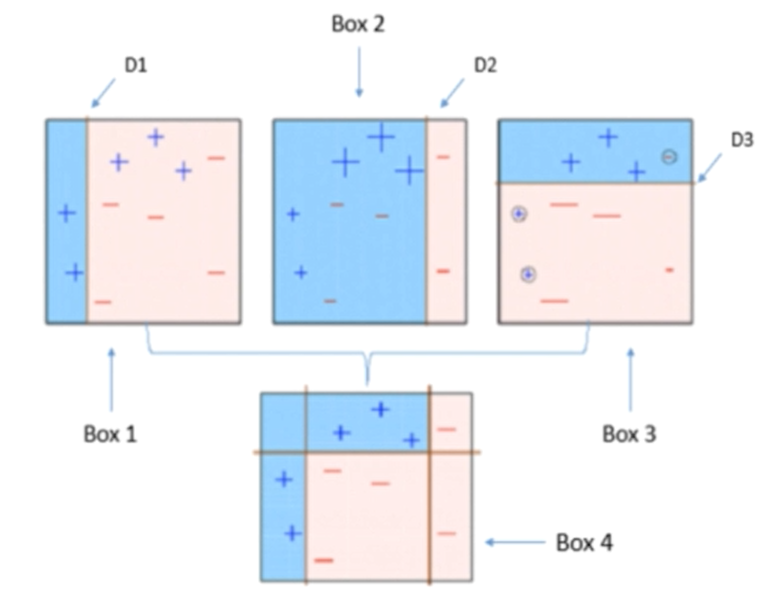


#### Gradient Boosting Machines
* Gradient Boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının(residuals) üzerine kurularak(fit) oluşturulur.
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanmakta.
* GB bir çok temel öğrenici tipi (base learner type) kullanabilir.(Trees, linear terms, splines,...)
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient Descent

## Model <a id="gbm_model"/>

In [193]:
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Tahmin <a id="gbm_tahmin"/>

In [196]:
y_pred = gbm_model.predict(X_test)

In [198]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.28029939893

## Model Tuning<a id="gbm_model_tuning"/>

In [199]:
gbm_params = {'learning_rate':[0.001, 0.01, 0.1, 0.2],
             'max_depth':[3, 4, 5, 8, 50, 100],
             'n_estimators': [200, 500, 1000, 2000],
             'subsample': [1, 0.5, 0.75]}

In [200]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2) # verbose bilgi verir
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  6.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [201]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}

In [209]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5).fit(X_train, y_train)

In [210]:
y_pred = gbm_tuned.predict(X_test)

In [211]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.5659480401842

In [214]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index = X_train.columns)

Text(0.5, 0, 'Değişkenlerin Önem Düzeyleri')

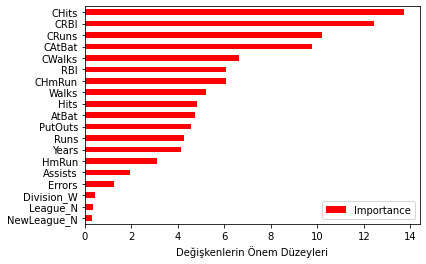

In [215]:
Importance.sort_values(by="Importance", axis=0,ascending=True).plot(kind="barh", color="r")

plt.xlabel("Değişkenlerin Önem Düzeyleri")

# eXtreme Gradient Boosting (XGBoost) <a id="xgb"/>

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
* R, Python, Hadoop, Scala, Julia ile kullanılabilir.
* Ölçeklenebilirdir.
* Hızlıdır.
* Tahmin Başarısı yüksektir.
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.

## Model <a id="xgb_model"/>

In [216]:
#!pip install xgboost

In [222]:
import xgboost as xgb

In [223]:
DM_train = xgb.DMatrix(data = X_train, label= y_train)
DM_test = xgb.DMatrix(data = X_test, label= y_test)

In [224]:
from xgboost import XGBRegressor

In [225]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin <a id="xgb_tahmin"/>

In [226]:
y_pred = xgb_model.predict(X_test)


In [227]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.4651481224188

## Model Tuning <a id="xgb_model_tuning"/>

In [228]:
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [229]:
xgb_grid = {'colsample_bytree':[0.4, 0.5, 0.6, 0.9, 1],
           'n_estimators': [100, 200, 500, 1000],
           'max_depth': [2, 3, 4, 5, 6],
           'learning_rate':[0.1, 0.01, 0.5]}

In [230]:
xgb = XGBRegressor()

In [231]:
xgb_cv = GridSearchCV(estimator=xgb, param_grid=xgb_grid, cv=10, n_jobs=-1, verbose=2)
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 1924 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrai...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1

In [232]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [233]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5, learning_rate=0.1, max_depth=2, n_estimators = 500)

In [234]:
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [235]:
y_pred = xgb_tuned.predict(X_test)

In [236]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275157777717

# LightGBM <a id="lgbm"/>

Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
* Daha Performanslı
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
* Breadth-first search(BFS) yerine depth-first search(DFS) kullanır.

## Model <a id="lgbm_model"/>

In [237]:
#!pip install lightgbm

In [238]:
from lightgbm import LGBMRegressor

In [239]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin <a id="lgbm_tahmin"/>

In [240]:
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration_)

In [241]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning <a id="lgbm_model_tuning"/>

In [242]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [244]:
lgbm_grid = {'learning_rate':[0.01, 0.1, 0.5, 1],
            'n_estimators':[20, 40, 100, 200, 500, 1000],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs=-1, verbose=2)

In [245]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   32.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20

In [246]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [247]:
lgbm_tuned = LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=20).fit(X_train, y_train)

In [248]:
y_pred = lgbm_tuned.predict(X_test)

In [249]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

# Category Boosting (CatBoost) <a id="cb"/>

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir değer GBM türevi

## Model <a id="cb_model"/>

In [250]:
#!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=d132185c1af2f41e36adfd5a01683dd0e3e37f328298c6edd5db859ac98a1759
  Stored in directory: C:\Users\omerc\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [251]:
from catboost import CatBoostRegressor

In [252]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 56.4ms	remaining: 56.3s
1:	learn: 432.4168868	total: 57.7ms	remaining: 28.8s
2:	learn: 426.3836690	total: 59.2ms	remaining: 19.7s
3:	learn: 420.2261014	total: 60.6ms	remaining: 15.1s
4:	learn: 414.9976675	total: 62ms	remaining: 12.3s
5:	learn: 409.6125323	total: 63.3ms	remaining: 10.5s
6:	learn: 403.9277911	total: 64.6ms	remaining: 9.17s
7:	learn: 398.4395285	total: 65.9ms	remaining: 8.17s
8:	learn: 392.4517081	total: 67.2ms	remaining: 7.4s
9:	learn: 387.4871123	total: 68.7ms	remaining: 6.8s
10:	learn: 382.6230510	total: 70ms	remaining: 6.3s
11:	learn: 378.1012454	total: 71.3ms	remaining: 5.87s
12:	learn: 372.6002306	total: 72.7ms	remaining: 5.52s
13:	learn: 368.4682192	total: 74ms	remaining: 5.21s
14:	learn: 364.0565766	total: 75.2ms	remaining: 4.94s
15:	learn: 359.5683249	total: 76.7ms	remaining: 4.72s
16:	learn: 355.1782794	total: 78.5ms	remaining: 4.54s
17:	learn: 350.4689946	total: 80ms	remaining: 4.36s
18:	learn: 346.2553

## Tahmin <a id="cb_tahmin"/>

In [253]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning <a id="cb_model_tuning"/>

In [254]:
catb_grid = {"iterations":[200, 500, 1000, 2000],
            "learning_rate":[0.01, 0.03, 0.05, 0.1],
            "depth":[3, 4, 5, 6, 7, 8]}

In [255]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# catb_cv_model.fit(X_train, y_train) ### 45+ DAKİKA SÜRÜYOR...